In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import numpy as np
from sklearn.metrics import f1_score
from tqdm import notebook
from scipy.stats import ranksums

In [2]:
[predictions_list, labels_all_deg_seed, labels_all_simba_seed, labels_all_simba_seed2] = \
    np.load('../temp/predictions_20seeds.npy', allow_pickle=True)

In [3]:
with open('/Users/alexanderhsu/Google Drive/My Drive/2023Data/asoid/ALL_test_data.sav', 'rb') as fr:
    [data_test, targets_test] = joblib.load(fr)

## simba method 1, overclassifying other

In [4]:
micro_deg_other = []
micro_simba_other = []
micro_asoid_other = []

micro_deg = []
micro_simba = []
micro_asoid = []

macro_deg_other = []
macro_simba_other = []
macro_asoid_other = []

macro_deg = []
macro_simba = []
macro_asoid = []

f1_deg_other = []
f1_simba_other = []
f1_asoid_other = []

f1_deg = []
f1_simba = []
f1_asoid = []


for s in notebook.tqdm(range(len(labels_all_deg_seed))):

    micro_deg_other.append(f1_score(targets_test,
                                    labels_all_deg_seed[s],
                                    average='weighted'))
    micro_simba_other.append(f1_score(targets_test,
                                      labels_all_simba_seed[s],
                                      average='weighted'))
    micro_asoid_other.append(f1_score(targets_test,
                                      predictions_list[-1][s],
                                      average='weighted'))

    micro_deg.append(f1_score(targets_test[(targets_test<3) &
                                           (labels_all_deg_seed[s]<3)],
                              labels_all_deg_seed[s][(targets_test<3) &
                                                     (labels_all_deg_seed[s]<3)],
                              average='weighted'))
    micro_simba.append(f1_score(targets_test[(targets_test<3) &
                                             (labels_all_simba_seed[s]<3)],
                                labels_all_simba_seed[s][(targets_test<3) &
                                                         (labels_all_simba_seed[s]<3)],
                                average='weighted'))
    micro_asoid.append(f1_score(targets_test[(targets_test<3) &
                                             (predictions_list[-1][s]<3)],
                                predictions_list[-1][s][(targets_test<3) &
                                                        (predictions_list[-1][s]<3)],
                                average='weighted'))

    macro_deg_other.append(f1_score(targets_test,
                                    labels_all_deg_seed[s], average='macro'))
    macro_simba_other.append(f1_score(targets_test,
                                      labels_all_simba_seed[s], average='macro'))
    macro_asoid_other.append(f1_score(targets_test,
                                      predictions_list[-1][s], average='macro'))

    macro_deg.append(f1_score(targets_test[(targets_test<3) &
                                           (labels_all_deg_seed[s]<3)],
                              labels_all_deg_seed[s][(targets_test<3) &
                                                     (labels_all_deg_seed[s]<3)],
                              average='macro'))
    macro_simba.append(f1_score(targets_test[(targets_test<3) &
                                             (labels_all_simba_seed[s]<3)],
                                labels_all_simba_seed[s][(targets_test<3) &
                                                         (labels_all_simba_seed[s]<3)],
                                average='macro'))
    macro_asoid.append(f1_score(targets_test[(targets_test<3) &
                                             (predictions_list[-1][s]<3)],
                                predictions_list[-1][s][(targets_test<3) &
                                                        (predictions_list[-1][s]<3)],
                                average='macro'))

    f1_deg_other.append(f1_score(targets_test,
                                 labels_all_deg_seed[s], average=None))
    f1_simba_other.append(f1_score(targets_test,
                                   labels_all_simba_seed[s], average=None))
    f1_asoid_other.append(f1_score(targets_test,
                                   predictions_list[-1][s], average=None))

    f1_deg.append(f1_score(targets_test[(targets_test<3) &
                                        (labels_all_deg_seed[s]<3)],
                              labels_all_deg_seed[s][(targets_test<3) &
                                                     (labels_all_deg_seed[s]<3)], average=None))
    f1_simba.append(f1_score(targets_test[(targets_test<3) &
                                          (labels_all_simba_seed[s]<3)],
                             labels_all_simba_seed[s][(targets_test<3) &
                                                      (labels_all_simba_seed[s]<3)],
                             average=None))
    f1_asoid.append(f1_score(targets_test[(targets_test<3) &
                                          (predictions_list[-1][s]<3)],
                                predictions_list[-1][s][(targets_test<3) &
                                                        (predictions_list[-1][s]<3)],
                             average=None))

  0%|          | 0/20 [00:00<?, ?it/s]

## if penalizing for mistakes labeling "other"

In [5]:
micro_deg_other = []
micro_simba_other = []
micro_asoid_other = []

micro_deg = []
micro_simba = []
micro_asoid = []

macro_deg_other = []
macro_simba_other = []
macro_asoid_other = []

macro_deg = []
macro_simba = []
macro_asoid = []

f1_deg_other = []
f1_simba_other = []
f1_asoid_other = []

f1_deg = []
f1_simba = []
f1_asoid = []


for s in notebook.tqdm(range(len(labels_all_deg_seed))):

    micro_deg_other.append(f1_score(targets_test,
                                    labels_all_deg_seed[s],
                                    average='weighted'))
    micro_simba_other.append(f1_score(targets_test,
                                      labels_all_simba_seed[s],
                                      average='weighted'))
    micro_asoid_other.append(f1_score(targets_test,
                                      predictions_list[-1][s],
                                      average='weighted'))

    micro_deg.append(f1_score(targets_test[(targets_test<3) &
                                           (labels_all_deg_seed[s]<3)],
                              labels_all_deg_seed[s][(targets_test<3) &
                                                     (labels_all_deg_seed[s]<3)],
                              average='weighted'))
    micro_simba.append(f1_score(targets_test[(targets_test<3) ],
                                labels_all_simba_seed[s][(targets_test<3)],
                                average='weighted'))
    micro_asoid.append(f1_score(targets_test[(targets_test<3) ],
                                predictions_list[-1][s][(targets_test<3)],
                                average='weighted'))

    macro_deg_other.append(f1_score(targets_test,
                                    labels_all_deg_seed[s], average='macro'))
    macro_simba_other.append(f1_score(targets_test,
                                      labels_all_simba_seed[s], average='macro'))
    macro_asoid_other.append(f1_score(targets_test,
                                      predictions_list[-1][s], average='macro'))

    macro_deg.append(f1_score(targets_test[(targets_test<3)],
                              labels_all_deg_seed[s][(targets_test<3)],
                              average='macro'))
    macro_simba.append(f1_score(targets_test[(targets_test<3)],
                                labels_all_simba_seed[s][(targets_test<3)],
                                average='macro'))
    macro_asoid.append(f1_score(targets_test[(targets_test<3)],
                                predictions_list[-1][s][(targets_test<3)],
                                average='macro'))

    f1_deg_other.append(f1_score(targets_test,
                                 labels_all_deg_seed[s], average=None))
    f1_simba_other.append(f1_score(targets_test,
                                   labels_all_simba_seed[s], average=None))
    f1_asoid_other.append(f1_score(targets_test,
                                   predictions_list[-1][s], average=None))

    f1_deg.append(f1_score(targets_test[(targets_test<3)],
                              labels_all_deg_seed[s][(targets_test<3)], average=None))
    f1_simba.append(f1_score(targets_test[(targets_test<3)],
                             labels_all_simba_seed[s][(targets_test<3)],
                             average=None))
    f1_asoid.append(f1_score(targets_test[(targets_test<3)],
                                predictions_list[-1][s][(targets_test<3)],
                             average=None))

  0%|          | 0/20 [00:00<?, ?it/s]

## simba method 2, finding which of the 4 binary classifier is best

In [6]:
micro_deg_other = []
micro_simba_other = []
micro_asoid_other = []

micro_deg = []
micro_simba = []
micro_asoid = []

macro_deg_other = []
macro_simba_other = []
macro_asoid_other = []

macro_deg = []
macro_simba = []
macro_asoid = []

f1_deg_other = []
f1_simba_other = []
f1_asoid_other = []

f1_deg = []
f1_simba = []
f1_asoid = []


for s in notebook.tqdm(range(len(labels_all_deg_seed))):

    micro_deg_other.append(f1_score(targets_test,
                              labels_all_deg_seed[s], average='weighted'))
    micro_simba_other.append(f1_score(targets_test,
                                labels_all_simba_seed2[s], average='weighted'))
    micro_asoid_other.append(f1_score(targets_test,
                                predictions_list[-1][s], average='weighted'))

    micro_deg.append(f1_score(targets_test[(targets_test<3) & (labels_all_deg_seed[s]<3)],
                              labels_all_deg_seed[s][(targets_test<3) & (labels_all_deg_seed[s]<3)],
                              average='weighted'))
    micro_simba.append(f1_score(targets_test[(targets_test<3) & (labels_all_simba_seed2[s]<3)],
                                labels_all_simba_seed2[s][(targets_test<3) & (labels_all_simba_seed2[s]<3)],
                                average='weighted'))
    micro_asoid.append(f1_score(targets_test[(targets_test<3) & (predictions_list[-1][s]<3)],
                                predictions_list[-1][s][(targets_test<3) & (predictions_list[-1][s]<3)],
                                average='weighted'))

    macro_deg_other.append(f1_score(targets_test,
                              labels_all_deg_seed[s], average='macro'))
    macro_simba_other.append(f1_score(targets_test,
                                labels_all_simba_seed2[s], average='macro'))
    macro_asoid_other.append(f1_score(targets_test,
                                predictions_list[-1][s], average='macro'))

    macro_deg.append(f1_score(targets_test[(targets_test<3) & (labels_all_deg_seed[s]<3)],
                              labels_all_deg_seed[s][(targets_test<3) & (labels_all_deg_seed[s]<3)],
                              average='macro'))
    macro_simba.append(f1_score(targets_test[(targets_test<3) & (labels_all_simba_seed2[s]<3)],
                                labels_all_simba_seed2[s][(targets_test<3) & (labels_all_simba_seed2[s]<3)],
                                average='macro'))
    macro_asoid.append(f1_score(targets_test[(targets_test<3) & (predictions_list[-1][s]<3)],
                                predictions_list[-1][s][(targets_test<3) & (predictions_list[-1][s]<3)],
                                average='macro'))

    f1_deg_other.append(f1_score(targets_test,
                              labels_all_deg_seed[s], average=None))
    f1_simba_other.append(f1_score(targets_test,
                                labels_all_simba_seed2[s], average=None))
    f1_asoid_other.append(f1_score(targets_test,
                                predictions_list[-1][s], average=None))

    f1_deg.append(f1_score(targets_test[(targets_test<3) & (labels_all_deg_seed[s]<3)],
                              labels_all_deg_seed[s][(targets_test<3) & (labels_all_deg_seed[s]<3)], average=None))
    f1_simba.append(f1_score(targets_test[(targets_test<3) & (labels_all_simba_seed2[s]<3)],
                                labels_all_simba_seed2[s][(targets_test<3) & (labels_all_simba_seed2[s]<3)], average=None))
    f1_asoid.append(f1_score(targets_test[(targets_test<3) & (predictions_list[-1][s]<3)],
                                predictions_list[-1][s][(targets_test<3) & (predictions_list[-1][s]<3)], average=None))

  0%|          | 0/20 [00:00<?, ?it/s]

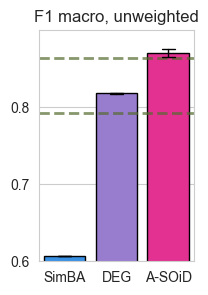

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(2, 3))
ax.set_title('F1 macro, unweighted')
ax.hlines(0.793, -.5, 2.5, ls='--', lw=2, color='darkolivegreen', alpha=0.7)
ax.hlines(0.864, -.5, 2.5, ls='--', lw=2, color='darkolivegreen', alpha=0.7)
sns.barplot([macro_simba, macro_deg, macro_asoid],
            estimator='median',
            capsize=.25,
            errorbar=('sd', 3),
            alpha=1,
            errcolor='k',
            errwidth=1,
            palette=['dodgerblue', 'mediumpurple', 'deeppink'],
            edgecolor='k',
            label=['SimBA', 'DEG', 'A-SOiD'],
            ax=ax)

ax.set_yticks(np.arange(0.6, 0.81, 0.1))
ax.set_xticklabels(['SimBA', 'DEG', 'A-SOiD'])
ax.set_ylim([0.6, 0.9])
plt.show()

fig.savefig('/Users/alexanderhsu/Google Drive/My Drive/manuscript_figures/asoid/additional/f1_macro_bar.svg')

In [52]:
ranksums(macro_deg, macro_asoid)

RanksumsResult(statistic=-5.410017808004594, pvalue=6.301848221392269e-08)

In [38]:
# stacking different metric types
micro_other = [np.mean(micro_simba_other), np.mean(micro_deg_other), np.mean(micro_asoid_other)]
micro = [np.mean(micro_simba), np.mean(micro_deg), np.mean(micro_asoid)]
macro_other = [np.mean(macro_simba_other), np.mean(macro_deg_other), np.mean(macro_asoid_other)]
macro = [np.mean(macro_simba), np.mean(macro_deg), np.mean(macro_asoid)]
f1_other = [np.mean(f1_simba_other, axis=0), np.mean(f1_deg_other, axis=0), np.mean(f1_asoid_other, axis=0)]
f1 = [np.mean(f1_simba, axis=0), np.mean(f1_deg, axis=0), np.mean(f1_asoid, axis=0)]

# put all in one list for figure
perf_metrics = [
    micro_other, micro,
    macro_other, macro,
    f1_other, f1,
               ]

# stacking different metric types (stdev)
micro_other_std = [np.std(micro_simba_other), np.std(micro_deg_other), np.std(micro_asoid_other)]
micro_std = [np.std(micro_simba), np.std(micro_deg), np.std(micro_asoid)]
macro_other_std = [np.std(macro_simba_other), np.std(macro_deg_other), np.std(macro_asoid_other)]
macro_std = [np.std(macro_simba), np.std(macro_deg), np.std(macro_asoid)]
f1_other_std = [np.std(f1_simba_other, axis=0), np.std(f1_deg_other, axis=0), np.std(f1_asoid_other, axis=0)]
f1_std = [np.std(f1_simba, axis=0), np.std(f1_deg, axis=0), np.std(f1_asoid, axis=0)]

# put all in one list for figure (stdev)
perf_metrics_std = [
    micro_other_std, micro_std,
    macro_other_std, macro_std,
    f1_other_std, f1_std,
               ]

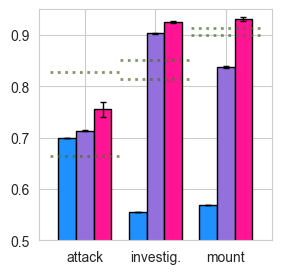

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
width=0.25
count = 5
# baseline
ax.hlines(0.664, -.5, .5, ls=':', lw=2, color='darkolivegreen', alpha=0.7)
ax.hlines(0.814, .5, 1.5, ls=':', lw=2, color='darkolivegreen', alpha=0.7)
ax.hlines(0.900, 1.5, 2.5, ls=':', lw=2, color='darkolivegreen', alpha=0.7)
# winner
ax.hlines(0.827, -.5, .5, ls=':', lw=2, color='darkolivegreen', alpha=0.7)
ax.hlines(0.852, .5, 1.5, ls=':', lw=2, color='darkolivegreen', alpha=0.7)
ax.hlines(0.913, 1.5, 2.5, ls=':', lw=2, color='darkolivegreen', alpha=0.7)
# opensource algos
ax.bar(np.arange(len(perf_metrics[count][0])) - width ,
       perf_metrics[count][0],
       width, color='dodgerblue', edgecolor='k')
ax.bar(np.arange(len(perf_metrics[count][1])),
       perf_metrics[count][1],
       width, color='mediumpurple', edgecolor='k')
ax.bar(np.arange(len(perf_metrics[count][2])) + width,
       perf_metrics[count][2],
       width, color='deeppink', edgecolor='k')

ax.errorbar(np.arange(len(perf_metrics[count][0])) - width,
            y=perf_metrics[count][0],
            yerr=3*perf_metrics_std[count][0],
            capsize=2, elinewidth=1,
            ls='none', color='k')
ax.errorbar(np.arange(len(perf_metrics[count][1])),
            y=perf_metrics[count][1],
            yerr=3*perf_metrics_std[count][1],
            capsize=2, elinewidth=1,
            ls='none', color='k')
ax.errorbar(np.arange(len(perf_metrics[count][2])) + width,
            y=perf_metrics[count][2],
            yerr=3*perf_metrics_std[count][2],
            capsize=2, elinewidth=1,
            ls='none', color='k')

ax.set_xticks(np.arange(0, 3))
ax.set_xticklabels(['attack', 'investig.', 'mount'])
ax.set_yticks(np.arange(0.5, 0.95, 0.1))
ax.set_ylim([0.5, 0.95])

plt.show()

fig.savefig('/Users/alexanderhsu/Google Drive/My Drive/manuscript_figures/asoid/additional/f1_behaviors_bar.svg')

In [53]:
ranksums(f1_deg, f1_asoid)

RanksumsResult(statistic=array([-5.41001781, -5.41001781, -5.41001781]), pvalue=array([6.30184822e-08, 6.30184822e-08, 6.30184822e-08]))

In [54]:
ranksums(f1_deg, f1_simba)

RanksumsResult(statistic=array([5.41001781, 5.41001781, 5.41001781]), pvalue=array([6.30184822e-08, 6.30184822e-08, 6.30184822e-08]))

In [35]:
np.arange(len(perf_metrics[count][2])) + width

array([0.25, 1.25, 2.25])

In [ ]:
rows = 3
cols = 2
width = 0.25
count = 0
fig, ax = plt.subplots(rows, cols, figsize=(2, 6), sharey=True, sharex=False)
for row in range(rows):
    for col in range(cols):
        if count < 4:
            ax[row, col].bar(np.arange(len(perf_metrics[count])), perf_metrics[count],
                             color=['gray', 'dodgerblue', 'deeppink'])
            if count == 3:
                ax[row, col].bar(3, 0.793,
                    color='k', alpha=0.8)
                ax[row, col].bar(4, 0.864,
                        color='k')
#                 ax[row, col].hlines(0.793, -.5, 2.5, color='k', ls=':')
#                 ax[row, col].hlines(0.864, -.5, 2.5, color='k', ls='--')


        elif count == 4:
            ax[row, col].bar(np.arange(len(perf_metrics[count][0])) - width , perf_metrics[count][0],
                    width, color='gray')
            ax[row, col].bar(np.arange(len(perf_metrics[count][1])) , perf_metrics[count][1],
                        width, color='dodgerblue')
            ax[row, col].bar(np.arange(len(perf_metrics[count][2])) + width, perf_metrics[count][2],
                        width, color='deeppink')
        elif count == 5:
            width=0.175
            ax[row, col].bar(np.arange(len(perf_metrics[count][0])) - 2*width , perf_metrics[count][0],
                    width, color='gray')
            ax[row, col].bar(np.arange(len(perf_metrics[count][1])) - width, perf_metrics[count][1],
                        width, color='dodgerblue')
            ax[row, col].bar(np.arange(len(perf_metrics[count][2])) , perf_metrics[count][2],
                        width, color='deeppink')
            ax[row, col].bar(np.arange(len(perf_metrics[count][2])) + width, [0.664, 0.814, 0.900],
                    width, color='k', alpha=0.8)
            ax[row, col].bar(np.arange(len(perf_metrics[count][2])) + width*2, [0.827, 0.852, 0.913],
                    width, color='k')

#                 ax[row, col].hlines(0.664, -.5, 2.5, color='deeppink', ls=':')
#                 ax[row, col].hlines(0.827, -.5, 2.5, color='deeppink', ls='--')
#                 ax[row, col].hlines(0.814, -.5, 2.5, color='deeppink', ls=':')
#                 ax[row, col].hlines(0.852, -.5, 2.5, color='deeppink', ls='--')
        if count == 4:
            ax[row, col].set_xlim([-.5, 3.5])
        elif count == 3:
            ax[row, col].set_xlim([-.5, 4.5])
        else:
            ax[row, col].set_xlim([-.5, 2.5])
#         else:
#             ax[row, col].bar(np.arange(len(perf_metrics[count])), perf_metrics[count])
        count += 1
        ax[row, col].set_ylim([0.25, 1])


        ax[row, col].spines['right'].set_visible(False)
        ax[row, col].spines['top'].set_visible(False)

# fig.savefig(r'F:\My Drive\manuscript_figures\asoid/additional/comparative_perf2.svg')